## Hello! This is a runthrough of Lab 7 for COSC 1010. 

It walks you through most of the logic on what we're doing and why. Hopefully, this will help set you all off on the right foot.

#### We’ll be writing a piece of software that allows us to identify the most common words in movies.
For example, we could be given the script (input):<br>
`["lona went to get coffee.",`<br>
`"lona ordered a pumpkin spice latte with almond milk, no whip.",`<br>
`"lona felt seratonin for the first time that day."]`

And will need to return the frequency of the most frequent word, followed by the word, i.e.: `[3, "lona"]`


## TODO 1 - define a fxn frequent_words that takes a script as a list of sentance strings.

We've done this before~! That's fairly easy.

In [1]:
def frequent_words(script):
    #where script is a list of strings, i.e. ["Lona held her office hours.", "Nobody came to visit her."].
    
    #code go here
    ...

## TODO 2 - count (and store) the number of times each word appears in the script.

We have not, in fact, done this before. But that's okay! I am here, don't fret, and I'll try to get you started off on the right foot.

Let's first remember that our overarching project goal is **to count how often each and every word in a script occurs, and then to return the word that occurs the most.**

The first thing we need to tackle in regards to this query is exactly how we're planning on storing the words and their frequencies, so that we can sort through them at the end and find the most frequent word. By choosing a data structure first, we can subsequentially determine how we "parse" (that is, look through) our data to count the frequency of each word.

So, let me ask you: **What types of data structure works best for storing words and their frequencies?**<br>
*(you may already know the answer from lecture today, but please humor me (: )*
 
>Let's think about some of our goals for this. Our data structure must...
> - increment a count for any given word every time it is encountered.
> - keep words and their counts "together" somehow.

>Oh, maybe a list of lists?<br>
>ex `[["lona", 1], ["tired", 1]]`... etc.<br>
>It could work. Lists of lists can keep words and their counts together, as demonstrated above: "lona" is stuck with "1" quite well!<br>
>However, **how are we planning on incrementing these counts?**

If we were to use a list of lists, we would have to hard-code a way to increment word counts ourselves (oh, the misery). And, on that note, we'd also have to account for duplicate words, to prevent the same word from being added to the list of lists twice!

Surely there's a more convenient and intuitive way to do this, right?

## Introducing... dictionaries!!

Luckily for us, Python is equipped with some fantastic libraries to conveniently and intuitively attack problems like this! We'll be digging into the lovely dictionary library for this task.

>A dictionary is a collection which is ordered and changeable, and does NOT allow for duplicate members.

Sounds like our cup of tea! 

I'm going to walk you through some common functionality of dictionaries here, and then we can take a look at how we might be able to use this fabulous data structure to take a look at our movie word counts (:

### Dictionary structure + construction

A dictionary consists of key-value pairs. We've seen them used before in the Toki lab, but we haven't really gotten into what exactly they are yet!

Let's take a look at what the construction of a dictionary looks like. To declare a dictionary, we use curly brackets `{}`!

Each item in the dictionary is formatted as a key:value pair.<br>
A **key** is a sort of 'lookup value' - *think of it like a word in a dictionary.*<br>
A **value** is the thing that the key is storing - *think of it like a definition in the dictionary.*<br>

Keys are most often strings, but values can be any data type you want - strings, chars, ints, doubles, floats... you name it!

Let's see this in action - below is an example dictionary of some of the COSC 1010 staff and their positions.<br>
- The **keys** are the positions - i.e. professor, graduate TA...
- The **values** are the names of the people in said positions - i.e. mike, andey...

In [2]:
cosc1010_dict = {
    #key : value
    "Professor": "Mike",
    "Graduate TA": "Andey",
    "Supplemental Instruction Leader": "Alicia",
    "Undergraduate TA": "Lona",
}

Each key-value pair is called an **item** - and these items stick together! This makes it easy to access the value of an item by utilizing the item's key. This is fairly similar to how you can look up a definition in a dictionary by looking up a word.<br>

Let's try to get the "Professor" value of COSC 1010 by using the professor key!

In [3]:
#You could use brackets encasing the key, similar to how we do operations on lists, to get a value from a key.
cosc1010_dict["Professor"]

'Mike'

In [4]:
#You could also use the .get() operation to get a value from a key!
cosc1010_dict.get("Professor")

'Mike'

Another nice trait about dictionaries is that you can match keys and values with different data types to each other.

Let's look at part of my grocery list and see how we can match **string keys** with **int values**, then get the value associated with a given string.

In [5]:
beverage_groceries = {
    #key : value
    "Monster Energy - Ultra Rosa": 4,
    "Yerba Mate - Mint": 7,
    "Almond Milk": 1,
    "Kombucha": 4 ,
}
beverage_groceries.get("Kombucha")

4

Cool! Hopefully we're kind of getting the hang of it now - and hopefully we can also see how dictionaries could be helpful for storing word counts.

### Adding, updating, and all that jazz! 

Now that we've seen some examples of dictionaries and how to access values by their keys, let's get into some other operations we can do with dictionaries that might help us accomplish the task of getting word counts for every word in a script. 

Next, let's try to add a new key and value to an empty dictionary. For this example, I want to keep track of the number of cups of coffee each member of my lab, the MALLET lab, has drank this week, so that I know how much coffee I should buy for next week!

First, we make the empty dictionary. This is similar to how we make an empty list, but we use curly brackets!

In [6]:
mallet_coffee_consumption = {}

Alright, let's add our first lab member and their coffee consumption.<br>
`Josh` has drank `3` cups of coffee today.

**There are two different ways to add an item to a dictionary - let's take a look at them!**

`mallet_coffee_consumption.update({"Josh": 3})`<br>
> `update()` will update a dictionary with `{key: value}`. If the key `"Josh"` **is not in the dictionary**, the key-value pair `"Josh": 3` is added to the dictionary. If the key `"Josh"` is **already in the dictionary** , its value will be replaced with the new value.<br>

`mallet_coffee_consumption["Josh"] = 3`
> Using `[]` will add a new key of `"Josh"`, and its corresponding value `3` to the dictionary.

Personally, I find the `update()` method to be a lot easier to use - so I'd highly reccomend you try using it as well. That being said, both methods are equally efficient - so no sweat if you prefer the second method of adding items. 

Let's add our first item to this dictionary below!

In [7]:
mallet_coffee_consumption.update({"Josh": 3})

print(mallet_coffee_consumption)

{'Josh': 3}


Cool, let's go ahead and add a few more lab members...

In [8]:
mallet_coffee_consumption.update({"Lars": 0})
mallet_coffee_consumption.update({"Haniye": 1})
mallet_coffee_consumption.update({"Damir": 3})
mallet_coffee_consumption.update({"Natalie": 2})
mallet_coffee_consumption.update({"Lona": 5})

print(mallet_coffee_consumption)

{'Josh': 3, 'Lars': 0, 'Haniye': 1, 'Damir': 3, 'Natalie': 2, 'Lona': 5}


This just in: Natalie has drank a third cup of coffee today! She's already in our list, so **how do we increment her coffee count?**

Well, handy little trick - `update()` can not only add new key-value pairs to a dictionary, but it can also *literally* update them! Let's recall the definition from above...

> `update()` will update a dictionary with `{key: value}`. If the key is **already in the dictionary** , its value will be replaced with the new value.<br>

So we can increment Natalie's coffee-cup-count by using `update()`, neat!

In [9]:
mallet_coffee_consumption.update({"Natalie": 3})

print(mallet_coffee_consumption)

{'Josh': 3, 'Lars': 0, 'Haniye': 1, 'Damir': 3, 'Natalie': 3, 'Lona': 5}


Alright - say Lars has asked me if he's in the coffee consumption dictionary. **How would I be able to check if he is in the dictionary?**

We can use the `in` operator to check if a given key is already in the dictionary!!
> `in` returns `True` if a given key is already in the dictionary, and `False` if not.

Let's try that out below.

In [10]:
larsInDict = "Lars" in mallet_coffee_consumption

print(larsInDict)

True


Okay, I'm going out of town for the day and gave my dictionary to my friend Haniye to keep track of the coffee counts while I'm gone. She sees Damir drink another cup of coffee, but doesn't know what his current count is. 
**She determines that she will need to access his current coffee count, then add `1` to it. How would she do so?**

Lucky for Haniye, dictionaries are kind! We can use the `get()` function to get the value associated with a given key.
>`get(key)` returns the `value` associated with a given `key`. It returns the string `None` if the `key` is not in the dictionary.

Let's get Damir's coffee count!

In [11]:
damir_count = mallet_coffee_consumption.get("Damir")

print(damir_count)

3


Now that Haniye knows Damir's coffee count, she can update his value using `update()`! She's stored his *current* count in `damir_count`, so all she needs to do is add 1 to that count and pass that to update as the second parameter. Here's that in action!

In [12]:
mallet_coffee_consumption.update({"Damir": damir_count + 1})

print(mallet_coffee_consumption)

{'Josh': 3, 'Lars': 0, 'Haniye': 1, 'Damir': 4, 'Natalie': 3, 'Lona': 5}


Okay, we've gotten a *little* off track with all of these fun little examples - but hopefully they've shed some light on how we might be able to use a dictionary to help us with today's lab.

Let's get back to the code!

## Back to TODO 2...

Now we know that we want to make an empty dictionary to hold our word count pairs, let's get back to our function. I'll be hopping between this notebook and codio to show you all of the fun and exciting coding shenanigans. First, let's make that empty dictionary!

In [13]:
def frequent_words(script):
    #where script is a list of strings, i.e. ["Lona held her office hours.", "Nobody came to visit her."].
    
    words_frequency_pairs = {}

Cool beans! Next, we need to take a look at our script and figure out how we're going to look through it. We've done this a lot in past labs - any ideas on what tool we might use to iterate through every word in the script?

If you said (or thought) "for loop", you're correct! We'll need to make one for loop for each sentance in the script, and one for loop for each word in the sentance.

In [ ]:
def frequent_words(script):
    #where script is a list of strings, i.e. ["Lona held her office hours.", "Nobody came to visit her."].
    
    words_frequency_pairs = {}
    
    for sentance in script:
        #i.e. "Lona held her office hours"
        for word in sentance.split():
            #i.e. "Lona"

Alright - we've got a for loop going, and we've got a dictionary declared. Now all we need to do is some dictionary operations. Let's walk through what we want to do in each iteration of the internal `for word in sentance.split()` loop.

1. Check if the word is already in the dictionary
    - If word is in dictionary, increment the word's count by 1. add the word to the dictionary + a count of `1`.
2. If word is not in dictionary, add the word to the dictionary + a count of `1`.

I've given you all the pieces needed to do this - now it's up to you to put things together.
I'll get you started with some pseudocode, and some examples we went through that you can adapt to the purposes of your code.

In [ ]:
for sentance in script:
#(i.e. "Lona held her office hours")
   
    for word in sentance.split():
    #(i.e. "Lona")
    
        if word is in your dictionary: #try using if (word) in (dict)!
            
            - get current word count, store in variable
            #example from earlier: damir_count = mallet_coffee_consumption.get("Damir"))
            #this gets the current value that the key "Damir" is storing.
                    
            - increment word count using the stored word count + 1 and update()
            #example from earlier: `mallet_coffee_consumption.update({"Damir": damir_count + 1})
            #this increments the count at key "Damir" to 1. 
 
         else  #word is not in our dictionary, so we need to add it!*
 
            - update dictionary with new word + a count of 1
            #example from earlier: `mallet_coffee_consumption.update({"Josh": 3})`
            #this adds a new key:value pair, with a key of 'Josh' and a value of 3.

## TODO 3 - Identify the most common word in the script.

Alright - We'll come back to all of that in a bit, but let me also give you some framework for identifying the most common word in the script.

Assuming your dictionary is beautiful and wonderful, and elegantly stored each word and its frequency, how do we figure out what word has the highest frequency? 

>Let's think about some of our goals for this. We want to...
> - iterate through each item in the dictionary
> - keep track of the word with the highest frequency
> - compare each word's frequency to the highest frequency word

That's a lot - and there's no built-in dictionary function that can do it. We're going to have to use some of our knowledge of mathematical concepts and a bit of smart coding to accomplish this!

First and foremost, let's think about how we'll begin to iterate through each item in the dictionary. Don't fret, though! **Just like lists, we can also traverse each item in a dictionary utilizing one of our favourite loops! Any thoughts?**

~~yup it's a for loop lol~~

Whipping out our coffee count example, here's a little example of how we can traverse just the keys in a loop to do a roll-call for who's in the mallet lab. As a reminder, the keys are that first string value - in this case, the names of my fellow lab members.

>We can use the `keys()` function of a dictionary in a for loop to go through each key in the dictionary.

In [14]:
for name in mallet_coffee_consumption.keys():
    print(name + " is in the mallet lab!")

Josh is in the mallet lab!
Lars is in the mallet lab!
Haniye is in the mallet lab!
Damir is in the mallet lab!
Natalie is in the mallet lab!
Lona is in the mallet lab!


Okay, what if we want to get the values in the dictionary to do the roll call instead? As a reminder, the values are that int value stored with the strings - in this case, the number of cups of coffee each member has drank.


>We can use the `values()` function of a dictionary in a for loop to go through each value in the dictionary.

In [15]:
for count in mallet_coffee_consumption.values():
    print(str(count) + " cups of coffee!")

3 cups of coffee!
0 cups of coffee!
1 cups of coffee!
4 cups of coffee!
3 cups of coffee!
5 cups of coffee!


Well, these examples are fun, but for our lab today, don't need just the values or just the keys - we need both to determine which word has the highest count.

Luckily for us, there is a way to iterate through both keys and values at the same time!

>We can use the `items()` function of a dictionary in a for loop to go through each key and value pair in the dictionary.

However, we'll need to declare our for loop a little differently to properly iterate through our items. Instead of the `for x in y` syntax we've seen, we'll need to do a `for x, y in z` for loop so that we can keep those key-value pairs together!

Let's try one last example of that roll call, except with both keys and values.

In [16]:
for name, count in mallet_coffee_consumption.items():
    print(name + " has drank " + str(count) + " cups of coffee this week!")

Josh has drank 3 cups of coffee this week!
Lars has drank 0 cups of coffee this week!
Haniye has drank 1 cups of coffee this week!
Damir has drank 4 cups of coffee this week!
Natalie has drank 3 cups of coffee this week!
Lona has drank 5 cups of coffee this week!


Let's look at one more example of something we can do with that loop. We see here that we can reference 2 variables - `name`, which is the key of the pair, and `count`, which is the value of the pair.

I need the total number of cups of coffee drank this week, since I'm headed to walmart today! Let's total up the coffee cups using our handy dictionary loop, and see what we get.

In [17]:
#a variable to hold the total # of cups drank this week
totalCups = 0

for name, count in mallet_coffee_consumption.items():
    #add each count to the totalCups
    totalCups += count
    
print(totalCups)

16


Alright - so we know we can use a `for word, count in dictionary.items()` type of loop to iterate through each item in the dictionary. We also know we can access just the counts, or just the names - that's certainly helpful!!

**Next, how do we go about keeping track of the word with the highest frequency?**

Hmm... I think you have almost all the tools in your toolkit to solve this one on your own! But first, let me give you a little example program of how I would go about storing the largest integer in a list of ints.

Maybe it'll give you a bit of inspiration ;)

In [18]:
#Keep track of the largest integer in a list! Expected return: 2000

mylist = [3, 44, 2, 420, 69, 8, 3, 2000, 39, 1]

largest_int = 0

for integer in mylist:
    if integer > largest_int:
        largest_int = integer

print(largest_int)

2000


I think this is where I ought to leave you! Hopefully this was helpful, and gives you a bit of insight onto how to attack the rest of this lab <3!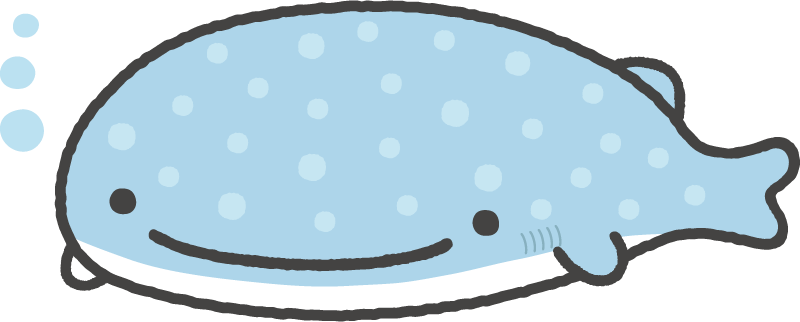